In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(ggh4x) # for facet_grid2() and strip_themed()
library(scales) # for percent()
library(ggtext)    # for strip_themed (theme strip customization)
library(grid)      # for unit()
library(tidyr) 
library(reshape2)
library(data.table)

Warning message:
"Paket 'dplyr' wurde unter R Version 4.2.3 erstellt"

Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"Paket 'ggplot2' wurde unter R Version 4.2.3 erstellt"
Warning message:
"Paket 'ggh4x' wurde unter R Version 4.2.3 erstellt"
Warning message:
"Paket 'scales' wurde unter R Version 4.2.3 erstellt"

Attache Paket: 'reshape2'


Das folgende Objekt ist maskiert 'package:tidyr':

    smiths



Attache Paket: 'data.table'


Die folgenden Objekte sind maskiert von 'package:reshape2':

    dcast, melt


Die folgenden Objekte sind maskiert von 'package:dplyr':

    between, first, last




## Figure 6
## Policy thresholds and lifespans for the pioneer zone in focus area S15
Policy thresholds and lifespans for the pioneer zone in focus area S15 for all critical marsh accretion models for different sea level rise thresholds based on RCP8.5 and RCP 4.5 projections (see highlighted boxes in figure 4, Class I and II). Policy performance is presented through the percentage of critical and susceptible models and the timing uncertainty bounds, the span between 5th and 50th percentile of estimated critical years. 

Middle: RCP8.5 and 4.5 timing bandwidths of SLR thresholds for the German Bight.


### Load plotting data
**Plotting data for the policy lifespans**: Pre-processed data. All accretion model outputs for the pioneer zone in focus area S15 under RCP8.5, respectively RCP 4.5, were grouped with respect to the applied policy in each model. 

The percentage of those that were assigned critical or susceptible class using the estimated critical year outcome was  used as a proxy for the likelihood of marsh drowning. From the set of estimated critical years for those models, the 5th percentile was used as lower, conservative risk bound while the  median serves as a measure for the typical timing of critical conditions. 

**Plotting data for the sea level ranges**: Raw data with pre-plot-processing performed in this notebook.

In [24]:
slr_ranges <- read.table('../data/figure_3_data/regional_slr_ar5.txt', sep = '\t', header = TRUE)[, 1:7]
slr_ranges_df = as.data.table(slr_ranges)
policy_bandwidths_data = read_excel("../data/figure_6_data.xlsx", sheet = "R_PIONEER_ZONE_I_II")
data_frame=as.data.frame(policy_bandwidths_data)

#### Figure 6 - top

In [20]:
# Filter the data
filtered_data_45 <- data_frame %>%
  filter(RCP == "RCP 4.5", transect == "S15")
# Define an offset for spacing between segments
offset <- 0.1

# Create a new data frame for plotting
plot_data_45 <- filtered_data_45 %>%
  mutate(
    threshold_numeric = as.numeric(threshold),
    threshold_offset = threshold_numeric + row_number() * offset
  )

##############     INDIVIDUAL STEP FOR EACH data_frame USED    ###################
plot_data_45$threshold_char<-c("0.5",  "0.5",  "0.6",  "0.5",  "0.6", "0.6")   


# Convert to factor with specific levels, ensuring "1.00" is included
plot_data_45$threshold_f <- factor(plot_data_45$threshold_char, levels = c("0.6", "0.5"))


plot_data_45 <- plot_data_45 %>%
  group_by(threshold) %>%
  mutate(threshold_offset = as.numeric(factor(Policy, levels = unique(Policy))))


##############################################################################
# Define the color palette for policies
palette_policy <- c(
  'No nourishment | Conservation' = '#604611',
  'Nourishment (10 years) | Conservation' = '#F4C542',
  'Nourishment (5 years) | Conservation' = '#DDA63A',
  'Nourishment (annual) | Conservation' = '#7D5A15',
  'No Nourishment | Marsh Restoration' = '#D2EF3F',
  'Nourishment (10 years) | Marsh Restoration' = '#8FC36B',
  'Nourishment (5 years) | Marsh Restoration' = '#3F7E44',
  'Nourishment (annual) | Marsh Restoration' = '#015CAF'
)



# Create the plot


policy_lifespan_45 <-ggplot(plot_data_45) +
	geom_segment(
  aes(x = central_crit_year_annotate-0.4, xend = central_crit_year_annotate, 
      y = threshold_offset ,  
      yend = threshold_offset  , 
      color = Policy),  size =5
)+
   geom_segment(
    aes(x = min_crit_year, xend = central_crit_year, y = threshold_offset, yend = threshold_offset, color = Policy),
    size = 5, alpha=0.4
       ) +
    scale_color_manual(values = palette_policy) +
	geom_text(
    		aes(x = 2042, # subtract an offset (adjust as needed)
       	 y = threshold_offset, 
       	 label = paste0(percent, "%")),
  	  size = 5,            # one size smaller than before
   	 color = "black",     # set text color to black
   	 hjust = 1,           # right-align the text so it sits just left of the bar
   	 vjust = 0.5
 	 ) +
	geom_text(aes(x = min_crit_year - 1, y = threshold_offset, label = min_crit_year), 
          color = "black", size = 5, hjust = 1) +

	geom_text(aes(x = central_crit_year-1, y = threshold_offset, label = central_crit_year_annotate), 
          color = "white", fontface = "bold", size = 5, hjust = 1)+

  facet_grid2(threshold_f ~ ., scales = "free_y", switch = "y",#) +
  strip = strip_themed( background_y = elem_list_rect(
      			fill = c(rep(c("#B4B6D3"), 4)),
       			color =rep(c("transparent"),4)),
       text_y = elem_list_text(colour = c(rep("#FFFFFF", 4)),
       by_layer_y = FALSE))

  )+
  labs(x = NULL, y = "SLR threshold", color = "Policy") +
  theme_bw() +
  theme(
    legend.title = element_blank(),
    strip.text.y = element_text(size = 20),
    strip.background = element_rect(fill = NA, colour = "black"),
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    legend.position = "bottom",
    legend.text = element_text(size = 16),
    legend.key.width = unit(2, "cm"),
    legend.key.size = unit(0.5, "cm"),
    plot.title = element_text(size = 25, face = "bold"),
    plot.subtitle = element_text(size = 23, face = "italic"),
    plot.caption = element_text(size = 17),
    axis.title.y = element_text(hjust = 0.5, size = 20),
    axis.text.y = element_blank(),
    panel.spacing = unit(0.5, "lines")  # Increase spacing between facets
  ) +
  guides(colour = guide_legend(ncol = 2)) +
  scale_x_continuous(
    limits = c(2040, 2100),
    breaks = seq(2040, 2100, by = 10),
    labels = seq(2040, 2100, by = 10)
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.2, 0.2)))  # Adjust y-axis padding

Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_segment()`)."


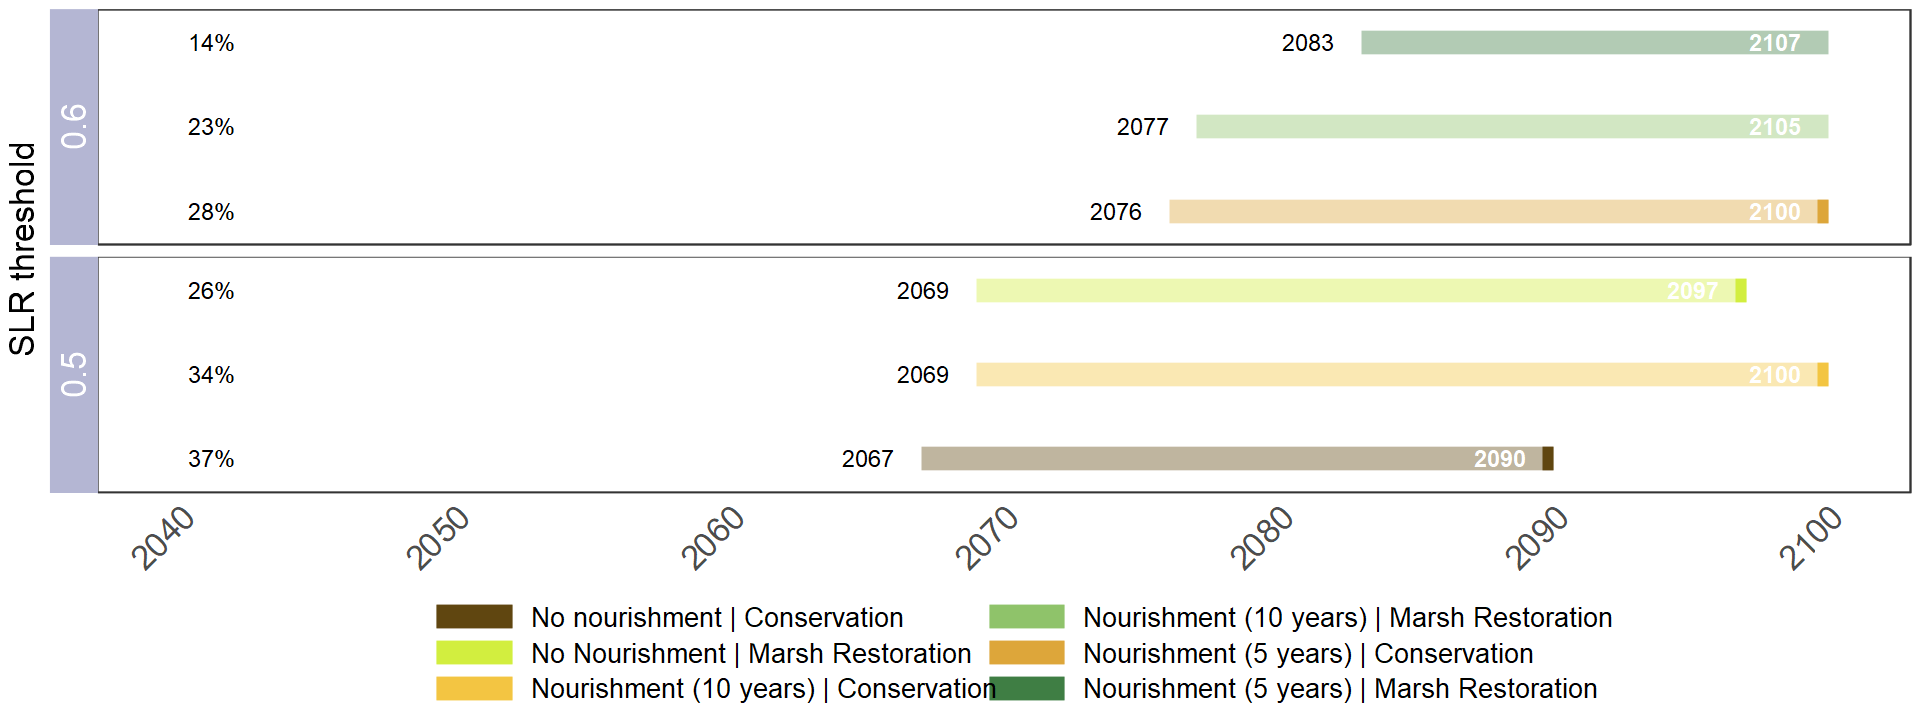

In [21]:
options(repr.plot.width = 16, repr.plot.height = 6)
print(policy_lifespan_45)

#### Figure 6 - middle
Here

In [70]:
melted = melt(slr_ranges_df, id.vars = "year")
DT=data.table(melted)
DT$year <- 	as.Date(paste0(DT$year, "-01-01"))

In [71]:
DT_50=DT[DT$value>=0.50]
thr_50<-DT_50[ , .SD[which.min(value)], by = variable]

DT_60=DT[DT$value>=0.6]
thr_60<-DT_60[ , .SD[which.min(value)], by = variable]


DT_80=DT[DT$value>=0.80]
thr_80<-DT_80[ , .SD[which.min(value)], by = variable]

DT_100=DT[DT$value>=1.0]
thr_100<-DT_100[ , .SD[which.min(value)], by = variable]


In [72]:
###############   Create new column indicating rcp and threshold ###############

d2<-thr_50 %>%
  tidyr::separate(col = variable, into = c("variable", "rcp"), sep = "_", remove = FALSE) %>% 
    mutate(threshold = 0.50)

d3<-thr_60  %>%
  tidyr::separate(col = variable, into = c("variable", "rcp"), sep = "_", remove = FALSE) %>% 
    mutate(threshold = 0.6)


d4<-thr_80 %>%
  tidyr::separate(col = variable, into = c("variable", "rcp"), sep = "_", remove = FALSE) %>% 
    mutate(threshold = 0.80)


d5<-thr_100 %>%
  tidyr::separate(col = variable, into = c("variable", "rcp"), sep = "_", remove = FALSE) %>% 
    mutate(threshold = 1.00)

#############      Create new dataframe and reshape to get a plot ready dataframe 

data2<-rbind(d2,d3,d4,d5)

final <- data2[,-4] %>%
  pivot_wider(names_from = variable, values_from = year)%>%
  as.data.frame()

In [73]:
final$max[is.na(final$max)]<-as.Date("2100-01-01", format="%Y-%m-%d")
final$min<- rep(as.Date("2100-01-01", format="%Y-%m-%d"),length(final$mean))
#final$minslr[is.na(final$minslr)]<-as.Date("2100-01-01", format="%Y-%m-%d")
final <- final %>%
  mutate(mean_segment = if_else(is.na(mean), as.Date("2100-01-01"), mean))

final$heigths_max <- c( 0.1,  0.024,  0.1, 0.024,  0.1, 0.024, 0.1)
final$heigths_min <- c( -0.048,  0.024, -0.048,  0.024 , -0.048,  0.024, -0.048 )

final$threshold_char<-c( "0.5",  "0.5",   "0.6", "0.6", "0.8", "0.8",  "1.0")

final$threshold <- as.character(final$threshold)

# Convert to factor with specific levels, ensuring "1.00" is included
final$threshold_f <- factor(final$threshold_char, levels = c("1.0", "0.8", "0.6", "0.5"))


final <- final %>%
  group_by(threshold) %>%
  mutate(threshold_offset = as.numeric(factor(rcp, levels = unique(rcp))))


color_palette <- c( "#444991","#FF0000")

palette_rcp <- c('45' = '#444991', '85' = '#FF0000')

In [75]:
slr_thresholds <- ggplot() + 
  geom_rect(
    data = final, mapping = aes(xmin = mean_segment, xmax = max, ymin = -heigths_min,
      ymax = heigths_max, fill = factor(rcp)), 
      alpha = 0.4, 
            ) +
  geom_segment(
  data = final,
  mapping = aes(
    x = mean_segment, 
    xend = mean_segment, 
    y = -heigths_min, 
    yend = heigths_max,
    color = factor(rcp)
  ),
  size = 2
)+
  scale_x_date(
    limits = as.Date(c('2040-01-01', '2100-01-01')),
    date_labels = "%Y",
    breaks = seq(as.Date("2040-01-01"), as.Date("2100-01-01"), by = "10 years")
  ) +
  scale_fill_manual(values = color_palette) +
  scale_color_manual(values = color_palette) +
  labs(
    fill = "RCP",
    color = "RCP",
    title = NULL,
    x = NULL,
    y = "SLR bandwidths [m]",
    subtitle = NULL
  ) +
  facet_grid(threshold_f ~ ., switch = "y", scales = "free", space = "free") +
  theme_bw() +
  theme(
    strip.text.y = element_text(size = 20),
    strip.background = element_rect(fill = NA, colour = "black"),
    panel.grid = element_blank(),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    legend.background = element_rect(color = "white", fill = "white"),
    legend.position = "bottom",
    legend.text = element_text(size = 16),
    legend.key.width = unit(2, "cm"),
    legend.key.size = unit(0.5, "cm"),
    plot.title = element_text(size = 25, face = "bold"),
    plot.subtitle = element_text(size = 23, face = "italic"),
    plot.caption = element_text(size = 17),
    axis.title.y = element_text(hjust = 0.5, size = 20),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    axis.text.y = element_blank()
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.2, 0.2)))


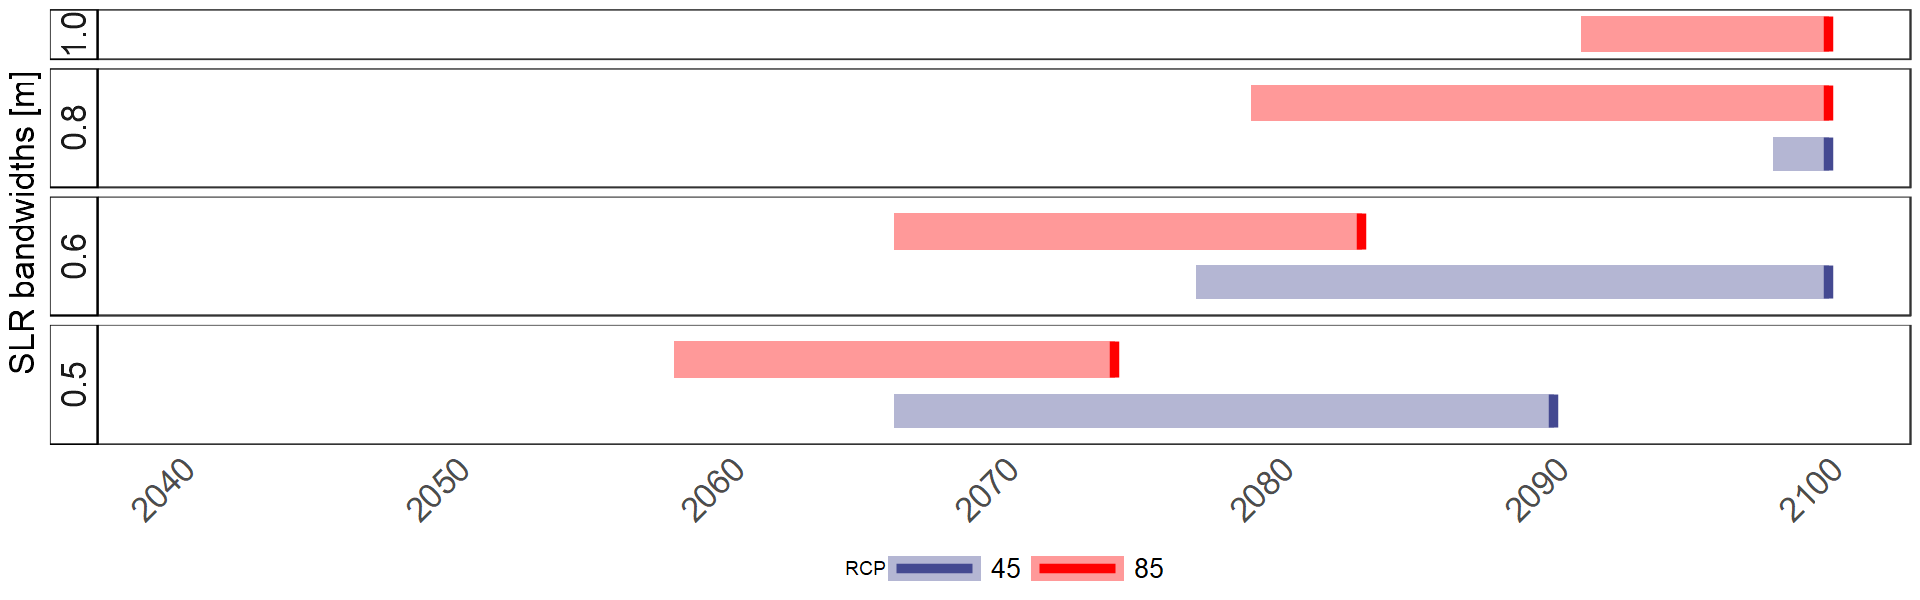

In [76]:
options(repr.plot.width = 16, repr.plot.height = 5)
print(slr_thresholds)

#### Figure 6 - bottom

In [25]:
# Filter the data
filtered_data_85 <- data_frame %>%
  filter(RCP == "RCP 8.5", transect == "S15")

# Define an offset for spacing between segments
offset <- 0.1

# Create a new data frame for plotting
plot_data_85 <- filtered_data_85 %>%
  mutate(
    threshold_numeric = as.numeric(threshold),
    threshold_offset = threshold_numeric + row_number() * offset
  )

##############     INDIVIDUAL STEP FOR EACH data_frame USED    ###################################
plot_data_85$threshold_char<-c("0.5",  "0.5",  "0.5",  "0.5",  "0.6", "0.6", "0.8",  "1.0")   


# Convert to factor with specific levels, ensuring "1.00" is included
plot_data_85$threshold_f <- factor(plot_data_85$threshold_char, levels = c("1.0", "0.8", "0.6", "0.5"))

plot_data_85 <- plot_data_85 %>%
  group_by(threshold) %>%
  mutate(threshold_offset = as.numeric(factor(Policy, levels = unique(Policy))))


In [26]:
# Define the color palette for policies
palette_policy <- c(
  'No nourishment | Conservation' = '#604611',
  'Nourishment (10 years) | Conservation' = '#F4C542',
  'Nourishment (5 years) | Conservation' = '#DDA63A',
  'Nourishment (annual) | Conservation' = '#7D5A15',
  'No Nourishment | Marsh Restoration' = '#D2EF3F',
  'Nourishment (10 years) | Marsh Restoration' = '#8FC36B',
  'Nourishment (5 years) | Marsh Restoration' = '#3F7E44',
  'Nourishment (annual) | Marsh Restoration' = '#015CAF'
)


policy_lifespan_85 <- ggplot(plot_data_85) +
  geom_segment(
    aes(
      x = central_crit_year_annotate - 0.4,  xend = central_crit_year_annotate, y = threshold_offset, 
      yend = threshold_offset,color = Policy
    ), 
    size = 5
  ) +
  geom_segment(
    aes(
      x = min_crit_year, xend = central_crit_year, y = threshold_offset, 
      yend = threshold_offset,color = Policy
    ),
    size = 5, alpha = 0.4
  ) +
  geom_text(
    aes(x = 2042,y = threshold_offset,label = paste0(percent, "%")),
    size = 5, color = "black",hjust = 1,vjust = 0.5
  ) +
  geom_text(
    aes(x = min_crit_year - 1, y = threshold_offset, label = min_crit_year),
    color = "black", size = 5, hjust = 1
  ) +
  geom_text(aes(x = central_crit_year - 1, y = threshold_offset, label = central_crit_year_annotate),
    color = "white",fontface = "bold", size = 5, hjust = 1
  ) +
  scale_color_manual(values = palette_policy) +
  facet_grid2(
    threshold_f ~ ., scales = "free_y", switch = "y", strip = strip_themed(background_y = elem_list_rect(
        fill = c(rep("#FF9999", 4)),color = rep("transparent", 4)
      ),
      text_y = elem_list_text(colour = c(rep("#FFFFFF", 4)),by_layer_y = FALSE))
  ) +
  labs(
    x = NULL, 
    y = "SLR threshold", 
    color = "Policy"
  ) +
  theme_bw() +
  theme(
    legend.title = element_blank(),
    strip.text.y = element_text(size = 20),
    strip.background = element_rect(fill = NA, colour = "black"),
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 20),
    axis.ticks.x = element_blank(),
    axis.ticks.y = element_blank(),
    legend.position = "bottom",
    legend.text = element_text(size = 16),
    legend.key.width = unit(2, "cm"),
    legend.key.size = unit(0.5, "cm"),
    plot.title = element_text(size = 25, face = "bold"),
    plot.subtitle = element_text(size = 23, face = "italic"),
    plot.caption = element_text(size = 17),
    axis.title.y = element_text(hjust = 0.5, size = 20),
    axis.text.y = element_blank(),
    panel.spacing = unit(0.5, "lines")
  ) +
  guides(colour = guide_legend(ncol = 2)) +
  scale_x_continuous(
    limits = c(2040, 2100),
    breaks = seq(2040, 2100, by = 10),
    labels = seq(2040, 2100, by = 10)
  ) +
  scale_y_continuous(expand = expansion(mult = c(0.2, 0.2)))

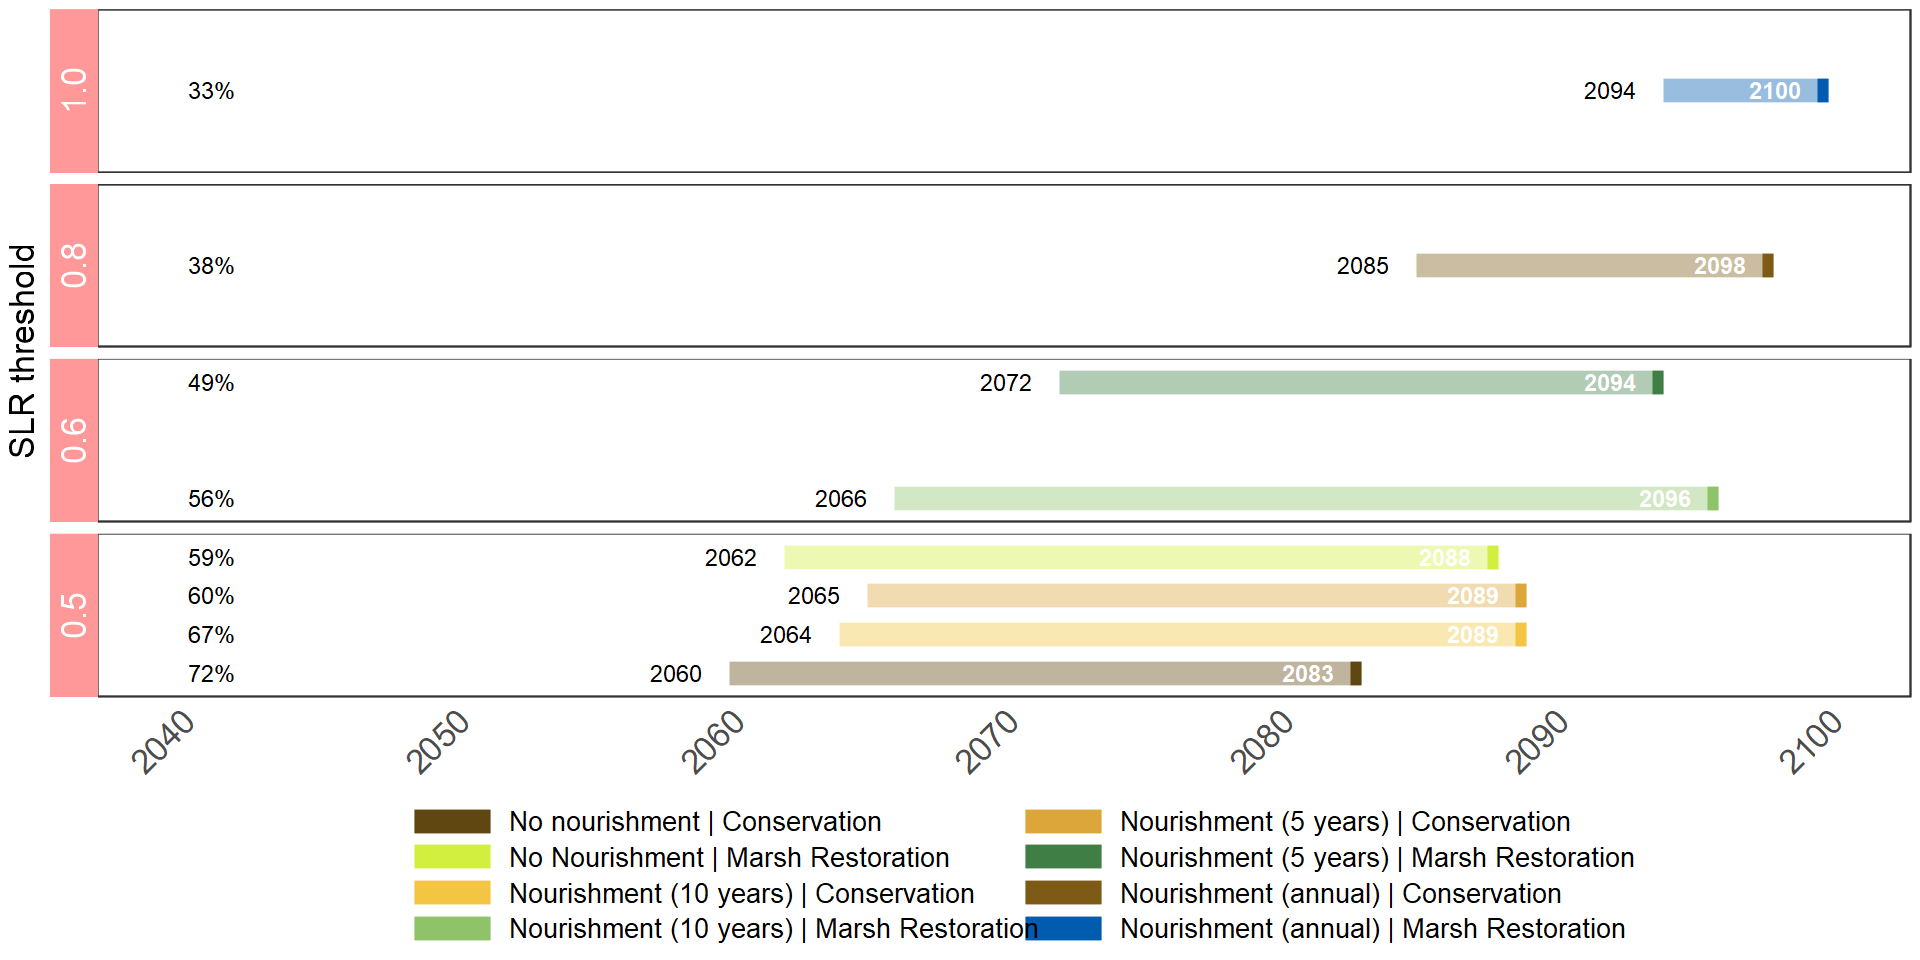

In [27]:
options(repr.plot.width = 16, repr.plot.height = 8)
print(policy_lifespan_85)